<a href="https://colab.research.google.com/github/appearedherosheep/ShelfLife-Foods/blob/main/2022_chemistry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 전처리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

Saving result.csv to result.csv


{'result.csv': b'\xef\xbb\xbftemperature/time,2\xe2\x84\x83,5\xe2\x84\x83,7\xe2\x84\x83\r\n0,0.84,0.84,0.84\r\n1,0.82,0.8,0.8\r\n2,0.76,0.73,0.7\r\n3,0.7,0.69,0.67\r\n4,0.6,0.58,0.57\r\n5,0.58,0.54,0.52\r\n6,0.56,0.52,0.5\r\n'}

In [ ]:
df = pd.read_csv('/content/result.csv')
df.head

<bound method NDFrame.head of    temperature/time    2℃    5℃    7℃
0                 0  0.84  0.84  0.84
1                 1  0.82  0.80  0.80
2                 2  0.76  0.73  0.70
3                 3  0.70  0.69  0.67
4                 4  0.60  0.58  0.57
5                 5  0.58  0.54  0.52
6                 6  0.56  0.52  0.50>

In [ ]:
df.shape

(7, 4)

In [ ]:
x = df['temperature/time']
y_2 = df['2℃']
y_5 = df['5℃']
y_7 = df['7℃']

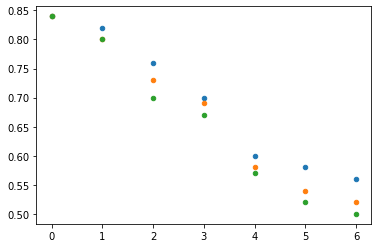

In [ ]:
plt.scatter(x,y_2,s=20)
plt.scatter(x,y_5,s=20)
plt.scatter(x,y_7,s=20)

## 선형회귀

In [ ]:
def prediction(theta_0, theta_1,x) :
    return theta_0 + theta_1*x

def prediction_difference(theta_0,theta_1,x,y) :
    return (theta_0 + theta_1*x)-y

def gradient_descent(theta_0, theta_1,x,y,iterations,alpha) :
    m=len(x)
    cost_list = []

    for i in range(iterations) :
        error = prediction_difference(theta_0,theta_1,x,y)
        cost = (error*error) / (2*m)
        cost_list.append(cost)

        theta_0 = theta_0 - alpha*error.mean()
        theta_1 = theta_1 - alpha*(error*x).mean()

        if i%10 == 0 :
            plt.scatter(x, y)
            plt.plot(x, prediction(theta_0, theta_1, x), color='red')
            plt.show()

    return theta_0, theta_1, cost_list

## 2℃

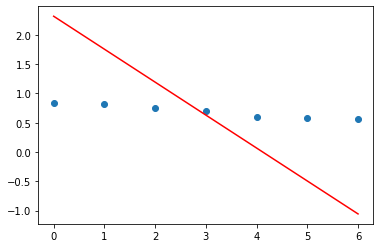

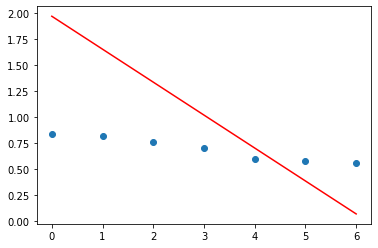

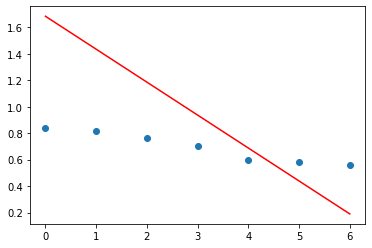

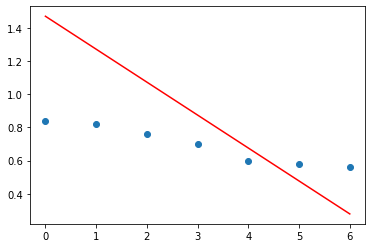

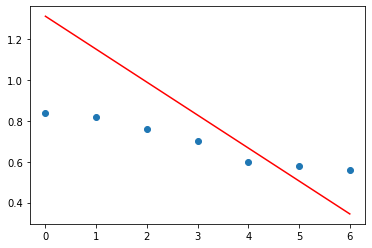

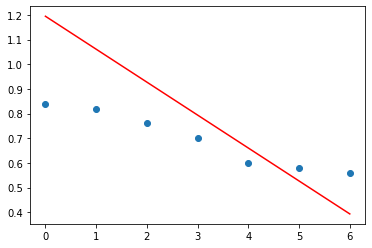

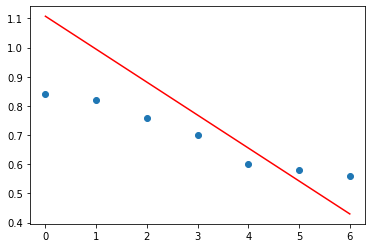

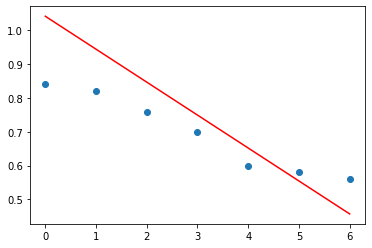

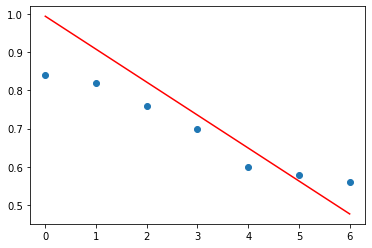

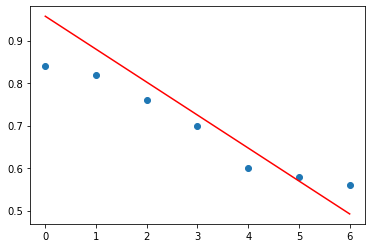

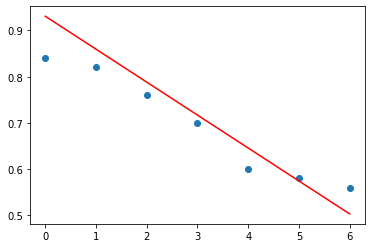

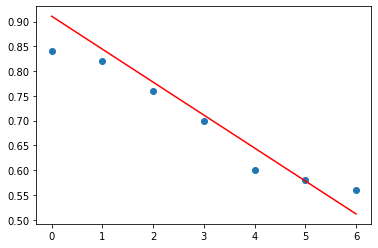

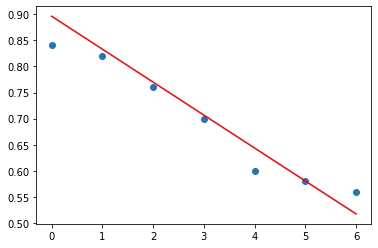

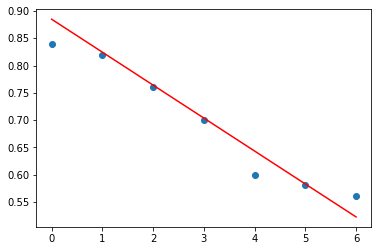

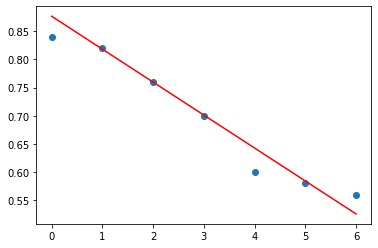

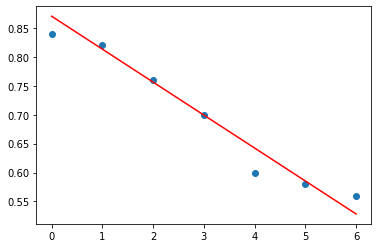

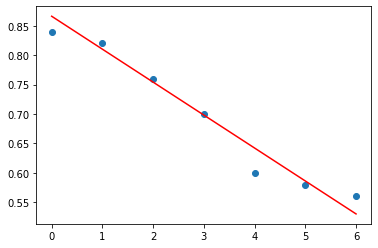

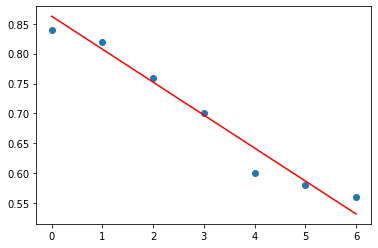

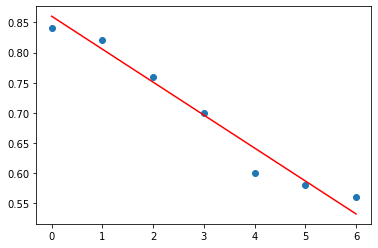

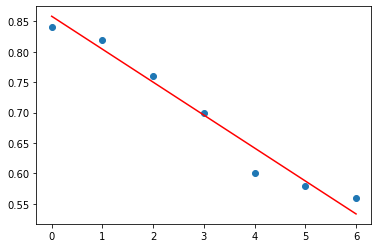

 2℃일 때 
 K: -0.05383593818384942, A_0: 0.857003386397131


In [ ]:
theta_0 = 2.5
theta_1 = 0
theta_0,theta_1,cost_list = gradient_descent(theta_0,theta_1, x, y_2,200,0.1)
k_2, A0_2 = theta_1,theta_0
print(f" 2℃일 때 \n K: {k_2}, A_0: {A0_2}")

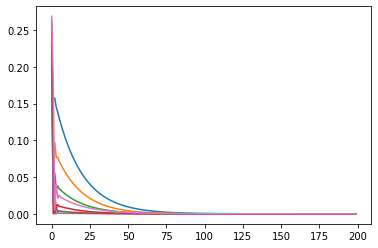

In [ ]:
plt.plot(cost_list)
plt.show()

## 5℃

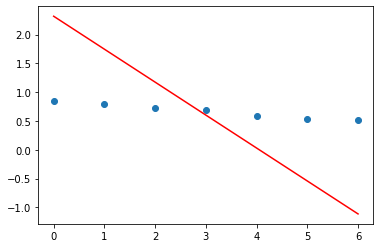

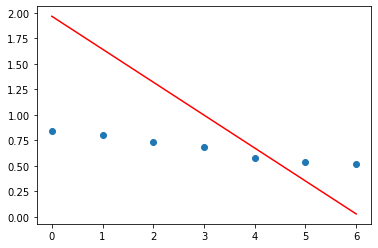

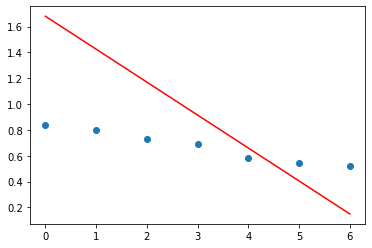

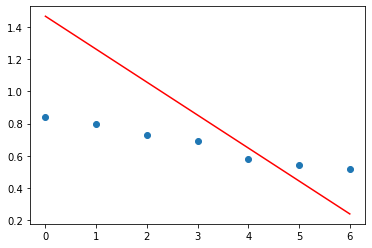

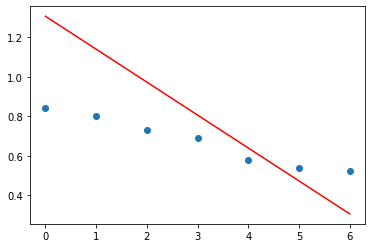

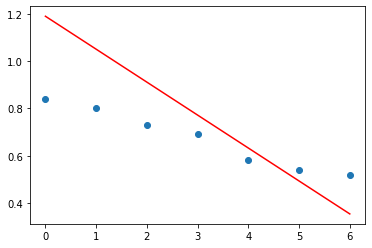

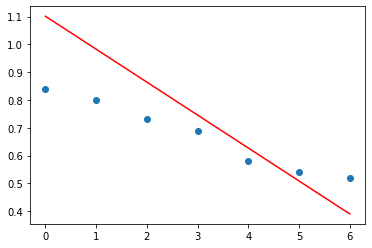

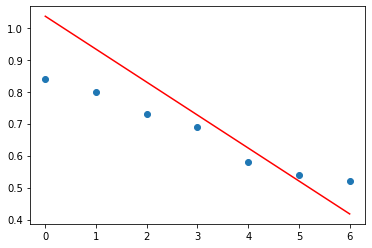

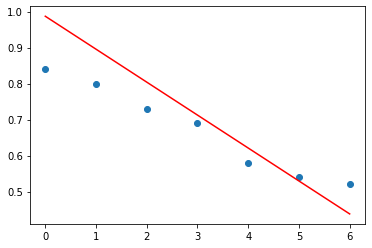

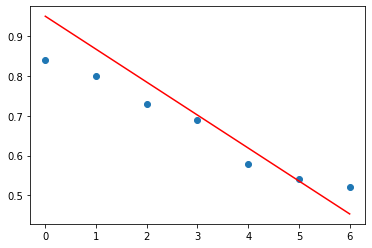

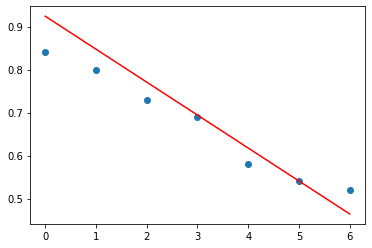

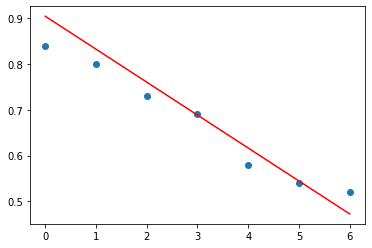

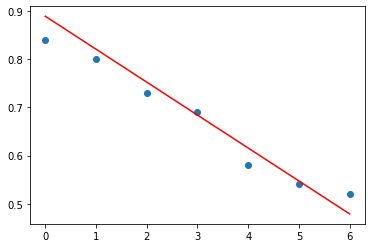

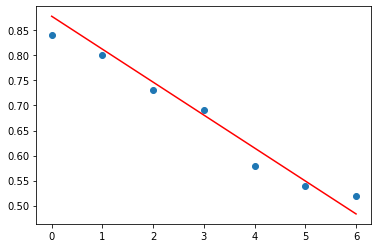

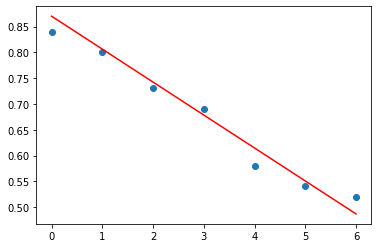

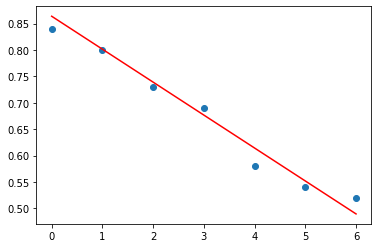

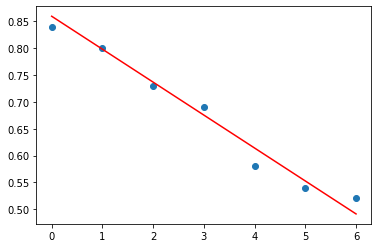

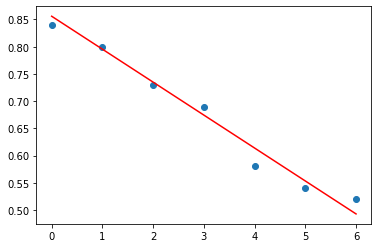

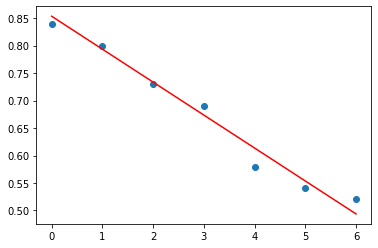

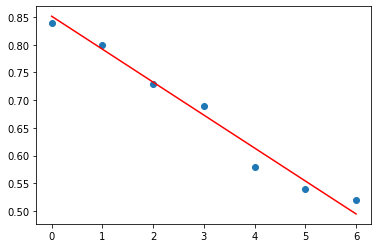

 5℃일 때 
 K: -0.05919638691229369, A_0: 0.8502316760069744


In [ ]:
theta_0 = 2.5
theta_1 = 0
theta_0,theta_1,cost_list = gradient_descent(theta_0,theta_1, x, y_5,200,0.1)
k_5, A0_5 = theta_1,theta_0
print(f" 5℃일 때 \n K: {k_5}, A_0: {A0_5}")

## 7℃

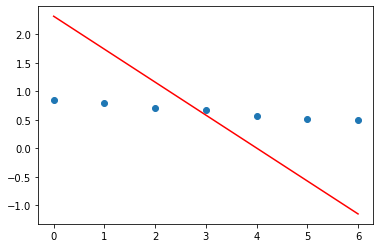

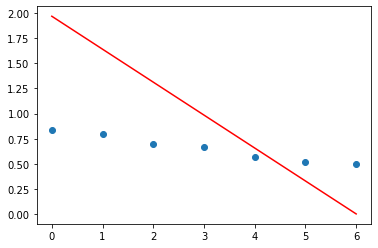

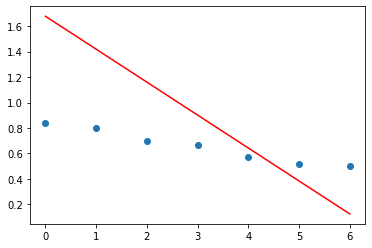

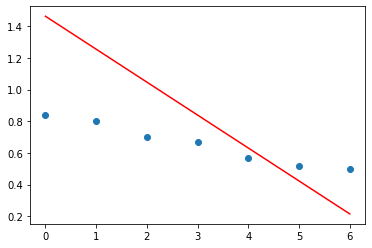

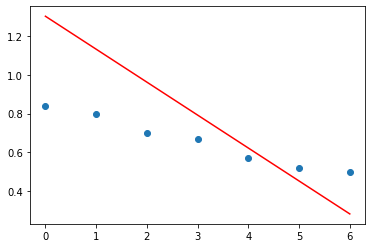

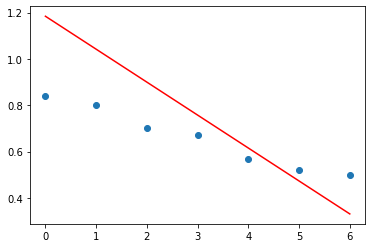

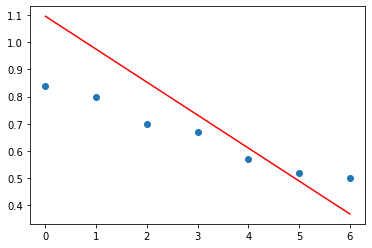

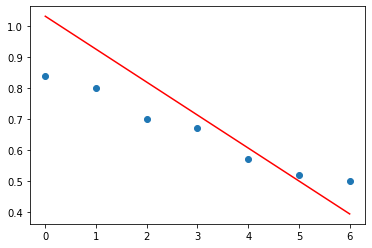

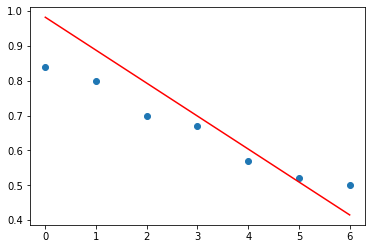

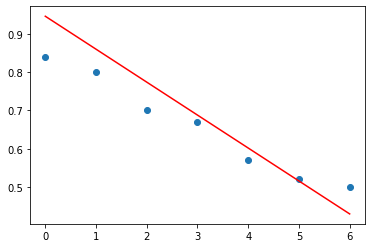

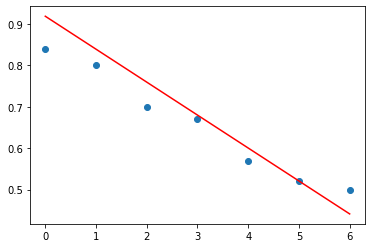

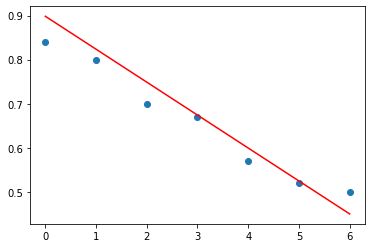

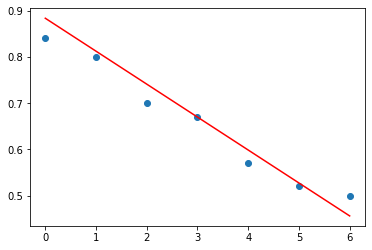

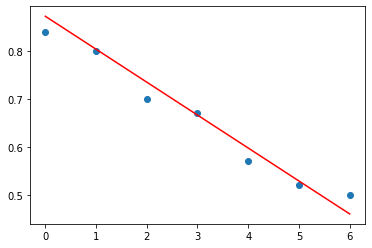

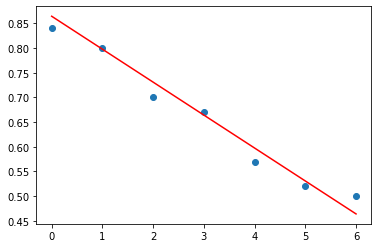

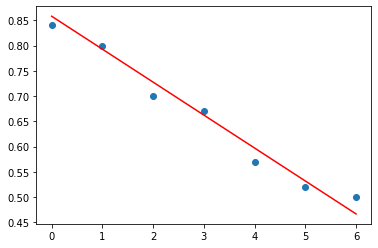

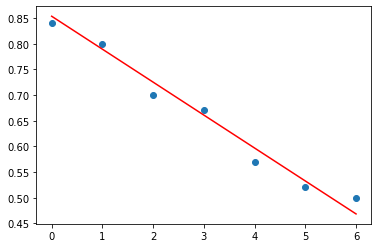

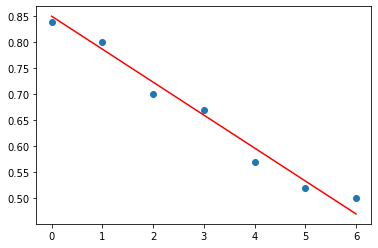

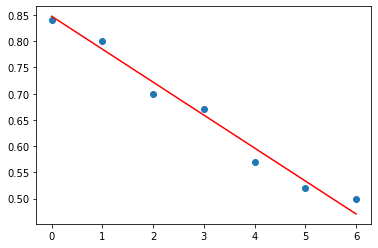

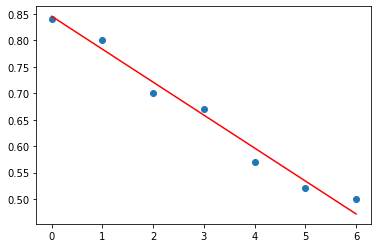

 7℃일 때 
 K: -0.06205654747545519, A_0: 0.8445301735005197


In [ ]:
theta_0 = 2.5
theta_1 = 0
theta_0,theta_1,cost_list = gradient_descent(theta_0,theta_1, x, y_7,200,0.1)
k_7, A0_7 = theta_1,theta_0
print(f" 7℃일 때 \n K: {k_7}, A_0: {A0_7}")

## Arrhenius Equation

In [ ]:
K = np.array([k_2,k_5,k_7])
T= np.array([2,5,7])
ln = np.vectorize(lambda x :np.log(-x))
lnK = ln(K)
rec = np.vectorize(lambda x: 1/(x+273))
T_rec = rec(T)
lnK, T_rec

(array([-2.92181404, -2.82689477, -2.77970925]),
 array([0.00363636, 0.00359712, 0.00357143]))

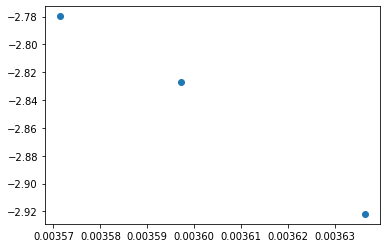

In [ ]:
plt.scatter(T_rec,lnK)
plt.show()

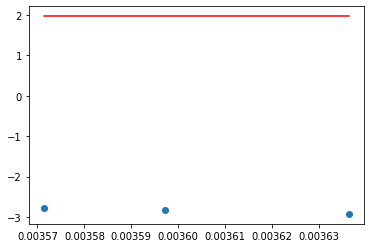

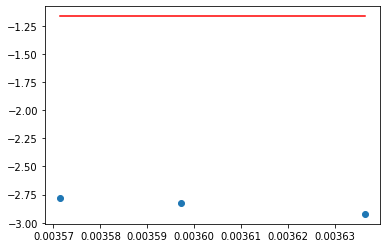

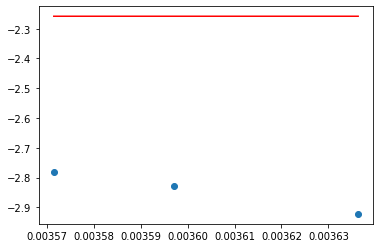

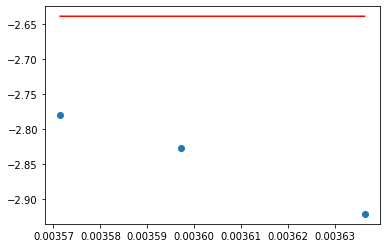

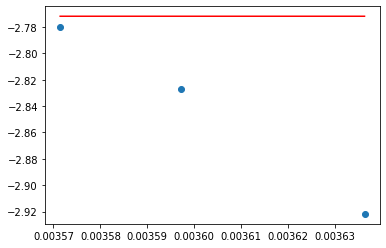

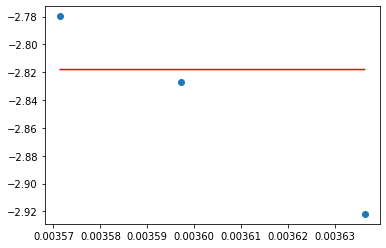

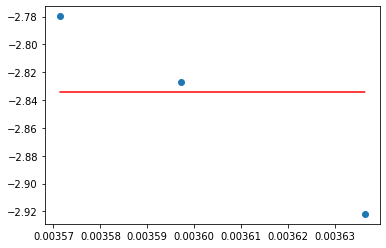

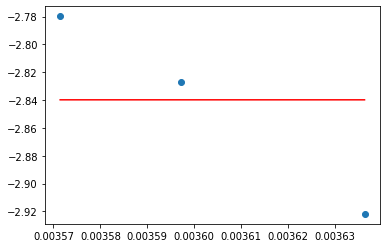

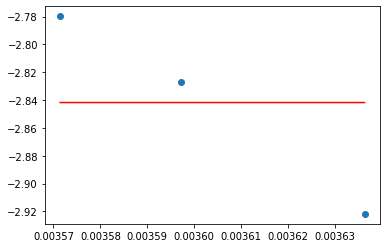

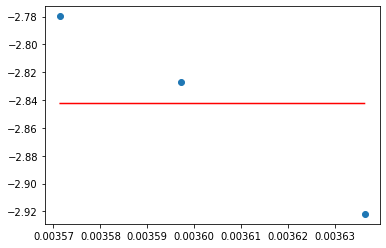

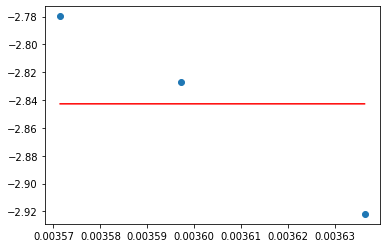

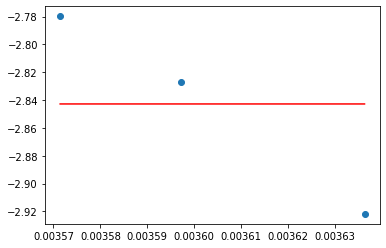

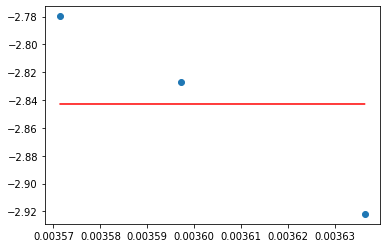

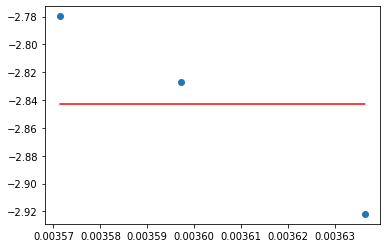

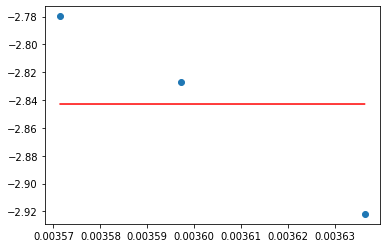

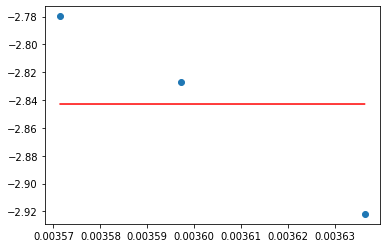

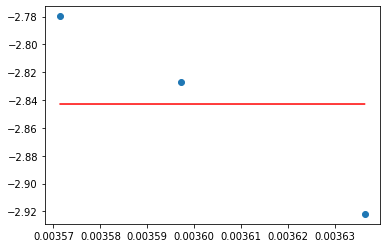

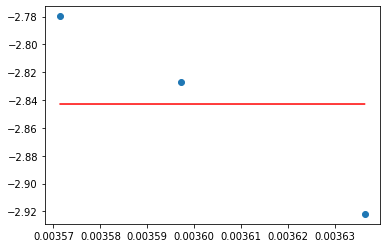

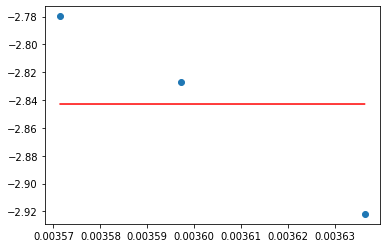

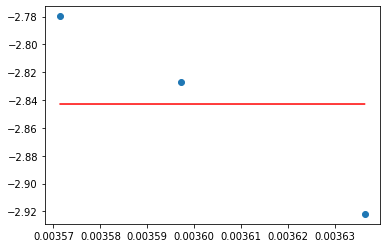

Ea/R = 0.019274080969379086 lnA = -2.842736604712799


In [ ]:
theta_0 = 2.5
theta_1 = 0
theta_0,theta_1,cost_list = gradient_descent(theta_0,theta_1,T_rec,lnK,200,0.1)
EaOverR, lnA = theta_1,theta_0
print(f"Ea/R = {-EaOverR} lnA = {lnA}")

In [ ]:
# R = 1.987 cal/(K*mol)
R = 1.987
Ea = EaOverR * R
print(f"Ea = {Ea}")

Ea = -0.03829759888615625


## 상온에서의 유통기한

In [ ]:
Q = 0.55
T = 25
t = (A0_2 - Q) /np.exp(EaOverR/T + lnA)
print(t)

5.273061201730293
